In [1]:
from ultralytics import YOLO

In [1]:
model = YOLO('runs/detect/train10/weights/best.pt')

NameError: name 'YOLO' is not defined


0: 1280x1280 1 5_19_1, 1: 1280x1280 2 5_19_1s, 2: 1280x1280 1 2_1, 2 5_19_1s, 1 3_27, 1 5_15_1, 994.2ms
Speed: 14.7ms preprocess, 331.4ms inference, 1.4ms postprocess per image at shape (1, 3, 1280, 1280)
Results saved to /Users/user/mastersITMO/TrafficSignDetection/runs/detect/predict11


<Figure size 1600x800 with 0 Axes>

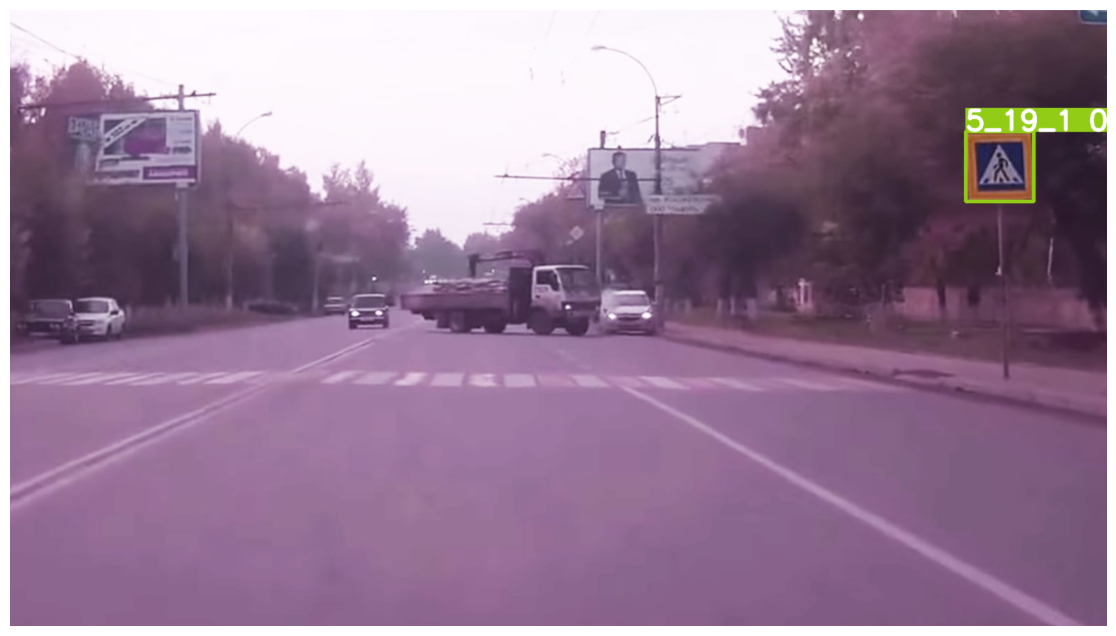

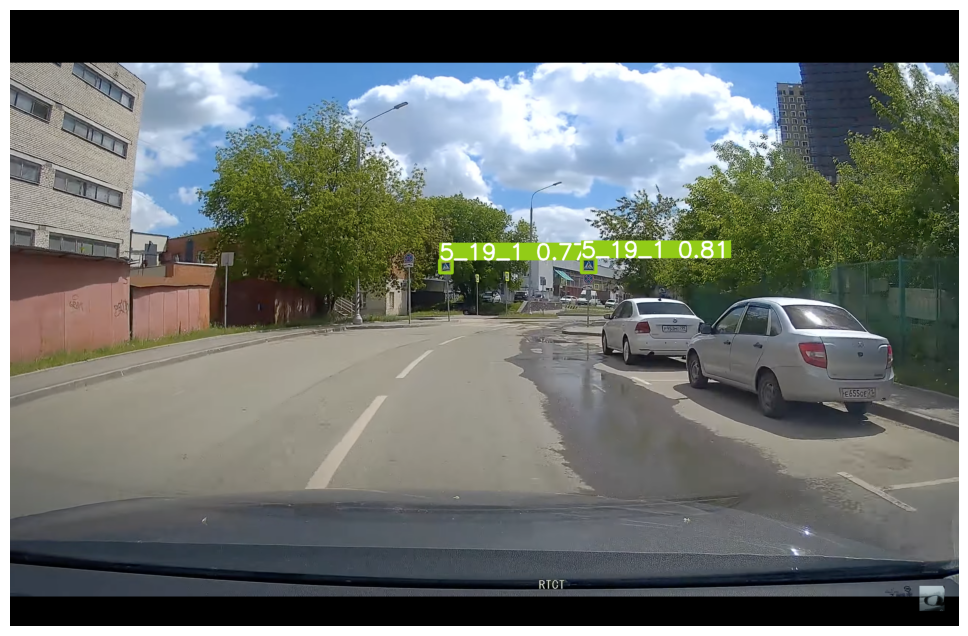

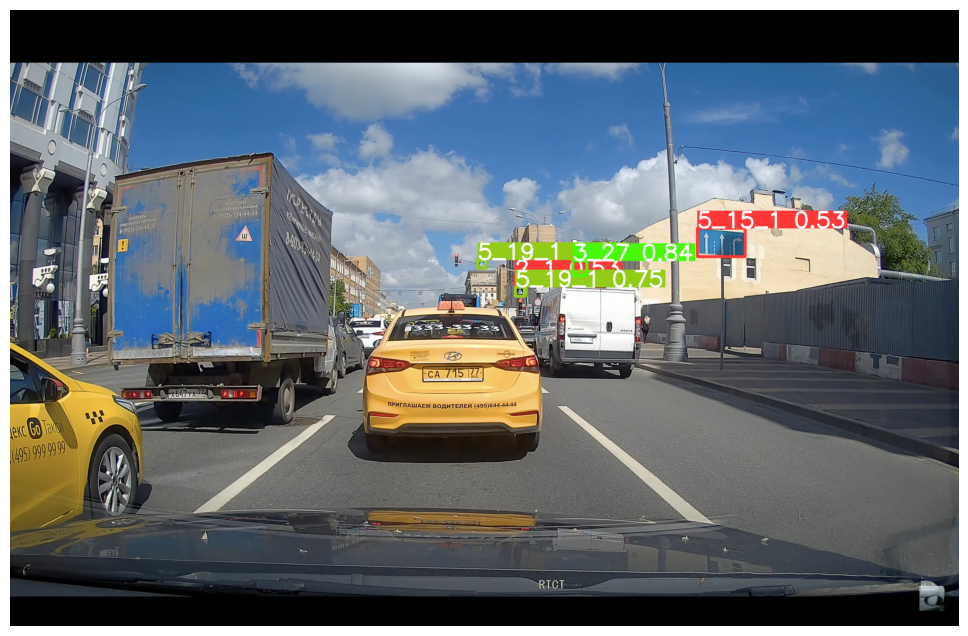

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np


results = model(['infer_data/test_sign_2.jpg', 'infer_data/test_sign_3.jpg', 'infer_data/test_sign_4.jpg'], save=True, imgsz=1280, conf=0.5)

for r in results:
    plt.figure(figsize=(16,8))
    im_array = r.plot()  # plot a BGR numpy array of predictions
    im = Image.fromarray(im_array[..., ::-1])  # RGB PIL image
    plt.imshow(im)
    plt.axis('off')
    plt.show()

**Test video**

In [ ]:
from moviepy.video.io.VideoFileClip import VideoFileClip

def split_video(input_file, output_template, num_parts, part_duration):
    clip = VideoFileClip(input_file)
    # Рассчитываем количество частей
    num_parts = min(num_parts, int(clip.duration / part_duration))
    # Разделяем видео на части
    for i in range(num_parts):
        start_time = i * part_duration
        end_time = (i + 1) * part_duration
        part = clip.subclip(start_time, end_time)
        # Сохраняем каждую часть с уникальным именем
        part_output_file = output_template.format(i+1)
        part.write_videofile(part_output_file, codec="libx264")  
    # Закрываем оригинальный видеофайл
    clip.close()

input_video = "infer_data/moscow_dash_cam.mp4"
output_template = "infer_data/dash_cam_{}.mp4"
num_parts = 10  # количество частей
part_duration = 30  # продолжительность каждой части в секундах
split_video(input_video, output_template, num_parts, part_duration)


In [ ]:
results = model('infer_data/dash_cam_10.mp4', save=True, save_txt=True, imgsz=1280, conf=0.5)

**Get logs**

In [6]:
import os
import cv2
import logging

logging.basicConfig(filename='../logs/app.log', level=logging.INFO)

txt_directory = '../runs/detect/predict11/labels'
video_path = '../runs/detect/predict11/dash_cam_10.mp4'

cap = cv2.VideoCapture(video_path)

frame_count = 0

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    frame_count += 1

    if frame_count % 30 == 0:
        txt_filename = f'dash_cam_10_{frame_count // 30}.txt'
        txt_filepath = os.path.join(txt_directory, txt_filename)

        with open(txt_filepath, 'r') as txt_file:
            txt_content = txt_file.readlines()
            ids = [line.split()[0] for line in txt_content]
            log_message = f'ОСТОРОЖНО! Впереди знаки: {ids}'
            print(log_message)
            logging.info(log_message)

    cv2.imshow('Video', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cv2.destroyAllWindows()
cap.release()



ОСТОРОЖНО! Впереди знаки: ['6', '34']
ОСТОРОЖНО! Впереди знаки: ['6', '34']
ОСТОРОЖНО! Впереди знаки: ['6', '34']
ОСТОРОЖНО! Впереди знаки: ['34', '6']
ОСТОРОЖНО! Впереди знаки: ['6', '34']
ОСТОРОЖНО! Впереди знаки: ['6', '34']
ОСТОРОЖНО! Впереди знаки: ['6', '34']
ОСТОРОЖНО! Впереди знаки: ['6', '34']
ОСТОРОЖНО! Впереди знаки: ['6', '34']
ОСТОРОЖНО! Впереди знаки: ['6', '34']
ОСТОРОЖНО! Впереди знаки: ['6', '34']
ОСТОРОЖНО! Впереди знаки: ['34', '6']
ОСТОРОЖНО! Впереди знаки: ['34', '6']
ОСТОРОЖНО! Впереди знаки: ['34', '6']
ОСТОРОЖНО! Впереди знаки: ['6', '34']
ОСТОРОЖНО! Впереди знаки: ['6', '34']
ОСТОРОЖНО! Впереди знаки: ['6', '34']
ОСТОРОЖНО! Впереди знаки: ['6', '34']
ОСТОРОЖНО! Впереди знаки: ['6', '34']
ОСТОРОЖНО! Впереди знаки: ['6', '34']
ОСТОРОЖНО! Впереди знаки: ['6', '34']
ОСТОРОЖНО! Впереди знаки: ['34', '6']
ОСТОРОЖНО! Впереди знаки: ['6', '34']
ОСТОРОЖНО! Впереди знаки: ['6', '34']
ОСТОРОЖНО! Впереди знаки: ['34', '6']
ОСТОРОЖНО! Впереди знаки: ['34', '6']
ОСТОРОЖНО! В

In [3]:
import cv2
video_path = '../runs/detect/predict11/dash_cam_1.mp4'
cap = cv2.VideoCapture(video_path)

# Получаем FPS видео
fps = cap.get(cv2.CAP_PROP_FPS)

# Выводим FPS
print(f'FPS видео: {fps}')

FPS видео: 30.0
